#### 📌 EDA - Problematic Internet Use
##### Objectif : Analyser et comprendre les données de train.csv pour préparer la modélisation.


##### 1- Charger et inspecter train.csv

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
train = pd.read_csv("../data/train.csv")

In [174]:
# Aperçu des premières lignes
train.head()

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT-PCIAT_20  \
0             50.8  ...             4.0             2.0             4.0   
1             46.0  ...             0.0             0.0             0.0   
2             75.6  ...             2.0             1.0             1.0   
3             81.6  ...             3.0             4.0             1.0   
4              NaN  ...             NaN             NaN             NaN   

   PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
0               55.0        NaN                NaN              NaN   
1                0.0       Fall               46.0             64.0   
2               28.0       Fall               38.0             54.0   
3               44.0     Summer               31.0             45.0   
4                NaN        NaN                NaN              NaN   

   PreInt_EduHx-Season PreInt_EduHx-computerinternet_hoursday  sii  
0                 Fall                                    3.0  2.0  
1               Summer                                    0.0  0.0  
2               Summer                                    2.0  0.0  
3               Winter                                    0.0  1.0  
4                  NaN                                    NaN  NaN  

[5 rows x 82 columns]

In [175]:
# Infos générales
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [176]:
import plotly.express as px
# Charger le dictionnaire des données
data_dict = pd.read_csv("../data/data_dictionary.csv")

# Aperçu rapide du fichier
print(data_dict.head(10))

# Vérifier sa taille
print(f"Le fichier contient {data_dict.shape[0]} lignes et {data_dict.shape[1]} colonnes.")

# Lister les colonnes du dictionnaire
print("\nColonnes disponibles :")
print(data_dict.columns)




                           Instrument                      Field  \
0                          Identifier                         id   
1                        Demographics  Basic_Demos-Enroll_Season   
2                        Demographics            Basic_Demos-Age   
3                        Demographics            Basic_Demos-Sex   
4  Children's Global Assessment Scale                CGAS-Season   
5  Children's Global Assessment Scale            CGAS-CGAS_Score   
6                   Physical Measures            Physical-Season   
7                   Physical Measures               Physical-BMI   
8                   Physical Measures            Physical-Height   
9                   Physical Measures            Physical-Weight   

                                Description             Type  \
0                          Participant's ID              str   
1                      Season of enrollment              str   
2                        Age of participant            floa

In [177]:
data_dict.head()

Instrument                      Field  \
0                          Identifier                         id   
1                        Demographics  Basic_Demos-Enroll_Season   
2                        Demographics            Basic_Demos-Age   
3                        Demographics            Basic_Demos-Sex   
4  Children's Global Assessment Scale                CGAS-Season   

               Description             Type                        Values  \
0         Participant's ID              str                           NaN   
1     Season of enrollment              str  Spring, Summer, Fall, Winter   
2       Age of participant            float                           NaN   
3       Sex of participant  categorical int                           0,1   
4  Season of participation              str  Spring, Summer, Fall, Winter   

       Value Labels  
0               NaN  
1               NaN  
2               NaN  
3  0=Male, 1=Female  
4               NaN

In [178]:
# Vérifier sa taille
print(f"Le fichier contient {data_dict.shape[0]} lignes et {data_dict.shape[1]} colonnes.")

# Lister les colonnes du dictionnaire
print("\nColonnes disponibles :")
print(data_dict.columns)


Le fichier contient 81 lignes et 6 colonnes.

Colonnes disponibles :
Index(['Instrument', 'Field', 'Description', 'Type', 'Values', 'Value Labels'], dtype='object')


In [179]:
# Vérifier si toutes les colonnes de train.csv sont bien dans le dictionnaire
columns_dict = set(data_dict["Field"])
columns_train = set(train.columns)

# Voir s'il manque des colonnes
missing_in_dict = columns_train - columns_dict
print(f"Colonnes absentes du dictionnaire : {missing_in_dict}" if missing_in_dict else " Toutes les colonnes sont bien décrites.")


Colonnes absentes du dictionnaire : {'sii'}


In [180]:
# Voir la répartition des variables par catégorie
category_counts = data_dict["Instrument"].value_counts().reset_index()
category_counts.columns = ["Instrument", "Nombre de variables"]

print("Répartition des variables par catégorie :")
print(category_counts)

# Visualisation interactive avec Plotly
fig = px.bar(category_counts, x="Instrument", y="Nombre de variables", 
             title="Répartition des variables par catégorie", text="Nombre de variables")

fig.update_traces(marker_color='blue', textposition='outside')
fig.update_layout(xaxis_title="Catégorie", yaxis_title="Nombre de variables")

fig.show()



Répartition des variables par catégorie :
                                       Instrument  Nombre de variables
0            Parent-Child Internet Addiction Test                   22
1                 Bio-electric Impedance Analysis                   17
2                               FitnessGram Child                   15
3                               Physical Measures                    8
4                FitnessGram Vitals and Treadmill                    4
5                         Sleep Disturbance Scale                    3
6                                    Demographics                    3
7                                    Internet Use                    2
8   Physical Activity Questionnaire (Adolescents)                    2
9      Physical Activity Questionnaire (Children)                    2
10             Children's Global Assessment Scale                    2
11                                     Identifier                    1


###  Conclusion  

Les variables du dataset sont réparties en 12 catégories, avec une forte dominance du Parent-Child Internet Addiction Test (PCIAT), qui représente 22 variables.  

On note aussi une présence importante de mesures physiologiques, tandis que les données sur l’activité physique et le sommeil sont moins représentées.  

L’identifiant (`id`) ne sera pas utilisé, et certaines variables devront être étudiées pour éviter les redondances ou le data leakage.  

### 2 Analyse des valeurs manquantes  


In [181]:
# Calculer le pourcentage de valeurs manquantes par colonne
missing_values = train.isnull().sum() / len(train) * 100

# Filtrer les colonnes ayant des valeurs manquantes
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Afficher les colonnes concernées
print("Colonnes ayant des valeurs manquantes et leur pourcentage :\n")
print(missing_values)


Colonnes ayant des valeurs manquantes et leur pourcentage :

PAQ_A-PAQ_A_Total                         88.005051
PAQ_A-Season                              88.005051
Fitness_Endurance-Time_Mins               81.313131
Fitness_Endurance-Time_Sec                81.313131
Fitness_Endurance-Max_Stage               81.237374
                                            ...    
Physical-Weight                           22.323232
PreInt_EduHx-computerinternet_hoursday    16.641414
Physical-Season                           16.414141
FGC-Season                                15.505051
PreInt_EduHx-Season                       10.606061
Length: 78, dtype: float64


In [182]:
# Vérifier le pourcentage de valeurs manquantes dans la colonne 'sii'
sii_missing_percentage = train["sii"].isnull().sum() / len(train) * 100

# Afficher le résultat
print(f"📌 Pourcentage de valeurs manquantes dans 'sii' : {sii_missing_percentage:.2f}%")


📌 Pourcentage de valeurs manquantes dans 'sii' : 30.91%


In [183]:
# Définition des seuils
high_missing = missing_values[missing_values > 50]  # Plus de 50% de NaN
medium_missing = missing_values[(missing_values > 20) & (missing_values <= 50)]  # Entre 20% et 50%
low_missing = missing_values[missing_values <= 20]  # Moins de 20%

# Afficher les résultats
print(f" Variables avec plus de 50% de valeurs manquantes : {high_missing.index.tolist()}")
print(f"Variables entre 20% et 50% de valeurs manquantes : {medium_missing.index.tolist()}")
print(f"Variables avec moins de 20% de valeurs manquantes : {low_missing.index.tolist()}")




 Variables avec plus de 50% de valeurs manquantes : ['PAQ_A-PAQ_A_Total', 'PAQ_A-Season', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'Fitness_Endurance-Max_Stage', 'Physical-Waist_Circumference', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSND', 'Fitness_Endurance-Season', 'PAQ_C-PAQ_C_Total', 'PAQ_C-Season']
Variables entre 20% et 50% de valeurs manquantes : ['BIA-BIA_SMM', 'BIA-BIA_DEE', 'BIA-BIA_TBW', 'BIA-BIA_FMI', 'BIA-BIA_LST', 'BIA-BIA_LDM', 'BIA-BIA_ICW', 'BIA-BIA_BMI', 'BIA-BIA_Frame_num', 'BIA-BIA_Fat', 'BIA-BIA_ECW', 'BIA-BIA_BMR', 'BIA-BIA_FFMI', 'BIA-BIA_BMC', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_FFM', 'BIA-Season', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_CU_Zone', 'FGC-FGC_TL_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_PU', 'FGC-FGC_CU', 'FGC-FGC_TL', 'CGAS-CGAS_Score', 'CGAS-Season', 'SDS-SDS_Total_T', 'SDS-SDS_Total_Raw', 'SDS-Season', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_16', 'PCIAT-PCI

In [184]:
# Liste des variables avec plus de 50% de NaN
high_missing = missing_values[missing_values > 50]

# Afficher les variables concernées
print(f"🔴 Variables avec plus de 50% de NaN ({len(high_missing)}) : {high_missing.index.tolist()}")



🔴 Variables avec plus de 50% de NaN (13) : ['PAQ_A-PAQ_A_Total', 'PAQ_A-Season', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'Fitness_Endurance-Max_Stage', 'Physical-Waist_Circumference', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSND', 'Fitness_Endurance-Season', 'PAQ_C-PAQ_C_Total', 'PAQ_C-Season']


In [185]:
# Suppression définitive des colonnes ayant plus de 50% de valeurs manquantes
train = train.drop(columns=high_missing.index)

# Vérification après suppression
print(f"✅ {len(high_missing)} variables avec plus de 50% de NaN ont été supprimées.")
print(f"📊 Nouvelle taille du dataset : {train.shape}")




✅ 13 variables avec plus de 50% de NaN ont été supprimées.
📊 Nouvelle taille du dataset : (3960, 69)


In [186]:
# Définition des seuils de valeurs manquantes
medium_missing = missing_values[(missing_values > 20) & (missing_values <= 50)]  # 20-50% de NaN
low_missing = missing_values[missing_values <= 20]  # <20% de NaN

# Affichage des résultats
print(f"🟠 Variables avec 20-50% de NaN ({len(medium_missing)}) : {medium_missing.index.tolist()}")
print(f"🟢 Variables avec <20% de NaN ({len(low_missing)}) : {low_missing.index.tolist()}")


🟠 Variables avec 20-50% de NaN (61) : ['BIA-BIA_SMM', 'BIA-BIA_DEE', 'BIA-BIA_TBW', 'BIA-BIA_FMI', 'BIA-BIA_LST', 'BIA-BIA_LDM', 'BIA-BIA_ICW', 'BIA-BIA_BMI', 'BIA-BIA_Frame_num', 'BIA-BIA_Fat', 'BIA-BIA_ECW', 'BIA-BIA_BMR', 'BIA-BIA_FFMI', 'BIA-BIA_BMC', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_FFM', 'BIA-Season', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_CU_Zone', 'FGC-FGC_TL_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_PU', 'FGC-FGC_CU', 'FGC-FGC_TL', 'CGAS-CGAS_Score', 'CGAS-Season', 'SDS-SDS_Total_T', 'SDS-SDS_Total_Raw', 'SDS-Season', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_02', 'sii', 'PCIAT-PCIAT_Total', 'PCIAT-Season', 'Physical-Systolic_BP', 

In [187]:
# Imputation des variables numériques avec 20-50% de NaN
for col in medium_missing.index:
    if train[col].dtype in ['float64', 'int64']:  # Si numérique
        train[col].fillna(train[col].median(), inplace=True)
    else:  # Si catégorique
        train[col].fillna(train[col].mode()[0], inplace=True)

print(f"✅ Imputation réalisée pour {len(medium_missing)} variables avec 20-50% de NaN.")


✅ Imputation réalisée pour 61 variables avec 20-50% de NaN.


In [188]:
# Imputation des variables numériques avec <20% de NaN
for col in low_missing.index:
    if train[col].dtype in ['float64', 'int64']:  # Si numérique
        train[col].fillna(train[col].median(), inplace=True)  # Médiane pour éviter les outliers
    else:  # Si catégorique
        train[col].fillna(train[col].mode()[0], inplace=True)  # Mode pour les variables catégorielles

print(f"✅ Imputation réalisée pour {len(low_missing)} variables avec <20% de NaN.")



✅ Imputation réalisée pour 4 variables avec <20% de NaN.


In [189]:
# Recalcul du nombre total de valeurs manquantes par colonne
remaining_missing_values = train.isnull().sum()

# Filtrer les colonnes qui ont encore des NaN
remaining_missing_values = remaining_missing_values[remaining_missing_values > 0]

# Affichage des résultats
if remaining_missing_values.empty:
    print(" Toutes les valeurs manquantes ont été imputées ! ")
else:
    print(f"🔍 Il reste {len(remaining_missing_values)} colonnes avec des valeurs manquantes :")
    print(remaining_missing_values.sort_values(ascending=False))


 Toutes les valeurs manquantes ont été imputées ! 


### 3 Analyse de la distribution des variables numériques

In [190]:
# Sélection des variables numériques
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Création d'un histogramme pour chaque variable
for col in numeric_columns:
    fig = px.histogram(train, x=col, title=f"Distribution de {col} après imputation", nbins=50)
    fig.show()

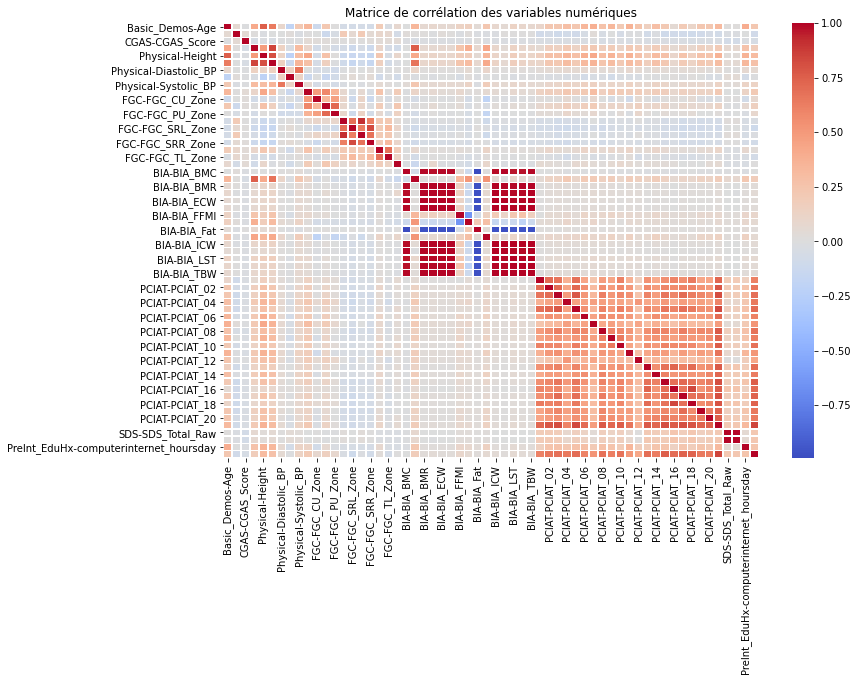

In [191]:
# Calcul de la matrice de corrélation
corr_matrix = train.corr()

# Affichage de la matrice sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()


In [192]:
# Trier les variables selon leur corrélation absolue avec la cible
target_corr = corr_matrix["sii"].abs().sort_values(ascending=False)

# Afficher les 10 variables les plus corrélées avec `sii`
print("🔍 Variables les plus corrélées avec sii :\n")
print(target_corr[1:20])  


🔍 Variables les plus corrélées avec sii :

PCIAT-PCIAT_Total    0.848798
PCIAT-PCIAT_15       0.751374
PCIAT-PCIAT_18       0.741232
PCIAT-PCIAT_17       0.740357
PCIAT-PCIAT_05       0.699991
PCIAT-PCIAT_16       0.698646
PCIAT-PCIAT_13       0.695713
PCIAT-PCIAT_03       0.687403
PCIAT-PCIAT_10       0.679992
PCIAT-PCIAT_08       0.677157
PCIAT-PCIAT_02       0.662016
PCIAT-PCIAT_19       0.653584
PCIAT-PCIAT_04       0.645155
PCIAT-PCIAT_20       0.637603
PCIAT-PCIAT_14       0.628763
PCIAT-PCIAT_09       0.619428
PCIAT-PCIAT_01       0.612784
PCIAT-PCIAT_06       0.605527
PCIAT-PCIAT_07       0.519346
Name: sii, dtype: float64


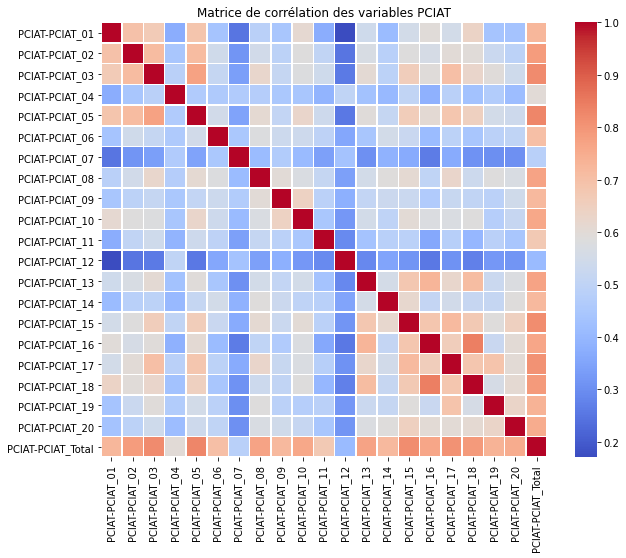

In [193]:
# Sélection des colonnes PCIAT
pciat_columns = [col for col in train.columns if "PCIAT" in col]
pciat_corr_matrix = train[pciat_columns].corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pciat_corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Matrice de corrélation des variables PCIAT")
plt.show()

In [194]:
train.head()

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1      Spring             65.0            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer             65.0          Spring     17.937682             55.0   

   Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT-PCIAT_20  \
0             50.8  ...             4.0             2.0             4.0   
1             46.0  ...             0.0             0.0             0.0   
2             75.6  ...             2.0             1.0             1.0   
3             81.6  ...             3.0             4.0             1.0   
4             77.0  ...             1.0             1.0             1.0   

  PCIAT-PCIAT_Total  SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
0              55.0      Spring               39.0             55.0   
1               0.0        Fall               46.0             64.0   
2              28.0        Fall               38.0             54.0   
3              44.0      Summer               31.0             45.0   
4              26.0      Spring               39.0             55.0   

   PreInt_EduHx-Season  PreInt_EduHx-computerinternet_hoursday  sii  
0                 Fall                                     3.0  2.0  
1               Summer                                     0.0  0.0  
2               Summer                                     2.0  0.0  
3               Winter                                     0.0  1.0  
4               Spring                                     1.0  0.0  

[5 rows x 69 columns]

In [151]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1️⃣ Suppression des colonnes inutiles
X = train.drop(columns=['id'])

# 2️⃣ Encodage des variables catégoriques
X = pd.get_dummies(X, drop_first=True)

# 3️⃣ Standardisation des données numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Données préparées pour le clustering !")


✅ Données préparées pour le clustering !


📊 Variance expliquée par PCA1 : 16.43%
📊 Variance expliquée par PCA2 : 12.96%
📊 Variance expliquée par PCA3 : 6.24%


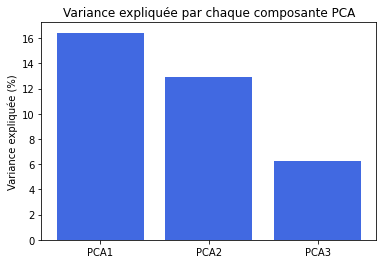

In [152]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# 1️⃣ Appliquer PCA
pca = PCA(n_components=3)  # On réduit à 3 composantes pour une visualisation 3D
X_pca = pca.fit_transform(X_scaled)

# 2️⃣ Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_
print(f"📊 Variance expliquée par PCA1 : {explained_variance[0]*100:.2f}%")
print(f"📊 Variance expliquée par PCA2 : {explained_variance[1]*100:.2f}%")
print(f"📊 Variance expliquée par PCA3 : {explained_variance[2]*100:.2f}%")

# 3️⃣ Visualisation de la variance expliquée
plt.figure(figsize=(6,4))
plt.bar(range(1, 4), explained_variance * 100, tick_label=["PCA1", "PCA2", "PCA3"], color='royalblue')
plt.ylabel("Variance expliquée (%)")
plt.title("Variance expliquée par chaque composante PCA")
plt.show()

# 4️⃣ Conversion en DataFrame
pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])



In [155]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Suppression de la colonne ID qui ne sert pas pour le clustering
X = train.drop(columns=['id'])

# Encodage des variables catégoriques
X = pd.get_dummies(X, drop_first=True)

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application du PCA pour réduire la dimensionnalité
pca = PCA(n_components=3)  # On garde les 3 premières composantes pour la visualisation
train_pca = pca.fit_transform(X_scaled)

print("✅ Réduction de dimension avec PCA terminée !")


✅ Réduction de dimension avec PCA terminée !


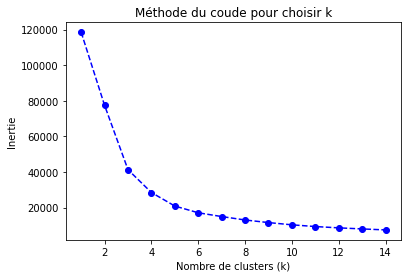

In [156]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Tester plusieurs valeurs de k
K_range = range(1, 15)
inertias = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_pca)  # train_pca = les données transformées par PCA
    inertias.append(kmeans.inertia_)

# Plot de la méthode du coude
plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o', linestyle='--', color='b')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Méthode du coude pour choisir k")
plt.show()



In [164]:
# Appliquer K-Means avec k=4 ou k=5
k_optimal = 5  # ou 5 selon l'analyse
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
train_pca_clusters = kmeans.fit_predict(train_pca)

# Ajouter les labels de clusters au dataset
train_clustered = pd.DataFrame(train_pca, columns=["PCA1", "PCA2", "PCA3"])
train_clustered["Cluster"] = train_pca_clusters

print("✅ Clustering K-Means avec k =", k_optimal, "terminé !")


✅ Clustering K-Means avec k = 5 terminé !


In [165]:
import plotly.express as px

fig = px.scatter_3d(train_clustered, x="PCA1", y="PCA2", z="PCA3", 
                     color=train_clustered["Cluster"].astype(str), 
                     title="Visualisation 3D des clusters après PCA",
                     labels={"Cluster": "Cluster"})
fig.show()



In [166]:
import pandas as pd

# Compter les observations par cluster
cluster_counts = train_clustered["Cluster"].value_counts()
print(cluster_counts)

# Visualisation
import plotly.express as px
fig = px.bar(cluster_counts, x=cluster_counts.index, y=cluster_counts.values, 
             title="Répartition des clusters", text_auto=True)
fig.show()


4    1631
3     985
1     776
0     567
2       1
Name: Cluster, dtype: int64


In [197]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Suppression de l'ID s'il est présent
X = train.drop(columns=['id'], errors='ignore')

# Vérifier quelles sont les colonnes catégoriques
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"Colonnes catégoriques détectées : {list(categorical_cols)}")

# Encoder les variables catégoriques
X = pd.get_dummies(X, drop_first=True)

# Vérification après encodage
print(f"✅ Après encodage, le dataset contient {X.shape[1]} colonnes.")

# Standardisation des données numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Données prêtes pour le clustering avec DBSCAN !")



Colonnes catégoriques détectées : ['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'FGC-Season', 'BIA-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season']
✅ Après encodage, le dataset contient 84 colonnes.
✅ Données prêtes pour le clustering avec DBSCAN !


In [198]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Suppression de l'ID s'il est présent
X = train.drop(columns=['id'], errors='ignore')

# Vérifier quelles sont les colonnes catégoriques
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"Colonnes catégoriques détectées : {list(categorical_cols)}")

# Encoder les variables catégoriques
X = pd.get_dummies(X, drop_first=True)

# Vérification après encodage
print(f"✅ Après encodage, le dataset contient {X.shape[1]} colonnes.")

# Standardisation des données numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Données prêtes pour le clustering avec DBSCAN !")



Colonnes catégoriques détectées : ['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'FGC-Season', 'BIA-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season']
✅ Après encodage, le dataset contient 84 colonnes.
✅ Données prêtes pour le clustering avec DBSCAN !


In [200]:
from sklearn.cluster import DBSCAN
import numpy as np
import plotly.express as px
import pandas as pd

# Appliquer DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)  # Ajuster les paramètres si nécessaire
clusters = dbscan.fit_predict(X_scaled)

# Ajouter les labels de clusters au DataFrame
train['DBSCAN_Cluster'] = clusters

# Vérifier la répartition des clusters
cluster_counts = train['DBSCAN_Cluster'].value_counts()
print("Répartition des clusters DBSCAN :")
print(cluster_counts)

# 🟢 **Visualisation en PCA 2D**
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_pca = pca.fit_transform(X_scaled)

# Convertir en DataFrame pour la visualisation
pca_df = pd.DataFrame(train_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot interactif avec Plotly
fig = px.scatter(pca_df, x='PCA1', y='PCA2', color=pca_df['Cluster'].astype(str),
                 title="Visualisation des clusters DBSCAN après PCA",
                 labels={'Cluster': 'Cluster DBSCAN'})

fig.show()


Répartition des clusters DBSCAN :
-1    3644
 3      66
 1      57
 7      51
 0      40
 2      24
 4      20
 9      18
 8      18
 5      11
 6      11
Name: DBSCAN_Cluster, dtype: int64
